In [1]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['axes.unicode_minus'] = False

(250, 2)


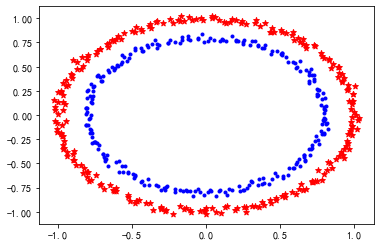

In [2]:
from sklearn.datasets import make_circles
from mpl_toolkits.mplot3d import Axes3D
# generating data
X, Y = make_circles(n_samples = 500, noise = 0.02)
idx_0 = np.where(Y == 0)#索引
#print(idx_0)
idx_1 = np.where(Y == 1)
X_0 = X[idx_0]
print(X_0.shape)
X_1 = X[idx_1]
# visualizing data
#plt.scatter(X[:, 0], X[:, 1], c = Y, marker = '.')
plt.scatter(X_0[:, 0], X_0[:, 1], c = 'r', marker = '*')
plt.scatter(X_1[:, 0], X_1[:, 1], c = 'b', marker = '.')
plt.show()
# adding a new dimension to X

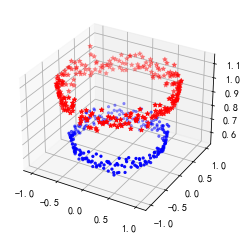

In [3]:
X1_0 = X_0[:, 0].reshape((-1, 1))
#print(X1_0.shape)
X2_0 = X_0[:, 1].reshape((-1, 1))
X3_0 = (X1_0**2 + X2_0**2)
#print(X3_0.shape)
X_0 = np.hstack((X_0, X3_0)) #将两个数组按水平方向组合起来
#print(X_0.shape)
X1_1 = X_1[:, 0].reshape((-1, 1))
X2_1 = X_1[:, 1].reshape((-1, 1))
X3_1 = (X1_1**2 + X2_1**2)
X_1 = np.hstack((X_1, X3_1))
# visualizing data in higher dimension
fig = plt.figure()
axes = fig.add_subplot(111, projection = '3d') #fig.add_subplot(111)就是构成1x1子图，第一个子图,projection是投影的意思
#axes.scatter(X1, X2, X1**2 + X2**2, c = Y, depthshade = True)
axes.scatter(X1_0, X2_0, X1_0**2 + X2_0**2, c = 'r', marker = '*', depthshade = True)
axes.scatter(X1_1, X2_1, X1_1**2 + X2_1**2, c = 'b', marker = '.', depthshade = True)
plt.show()

[[ 0.0159996   0.01882583 -7.36594025]]


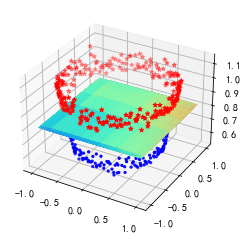

In [4]:
# create support vector classifier using a linear kernel
from sklearn import svm
# adding a new dimension to X
X1 = X[:, 0].reshape((-1, 1))
X2 = X[:, 1].reshape((-1, 1))
X3 = (X1**2 + X2**2)
X_3D = np.hstack((X, X3))
svc = svm.SVC(kernel = 'linear') #支持向量机分类器SVC
svc.fit(X_3D, Y)
w = svc.coef_
print(w)
b = svc.intercept_
# plotting the separating hyperplane
x1 = X[:, 0].reshape((-1, 1))
x2 = X[:, 1].reshape((-1, 1))
x1, x2 = np.meshgrid(x1, x2)
x3 = -(w[0][0]*x1 + w[0][1]*x2 + b) / w[0][2]
fig = plt.figure()
axes2 = fig.add_subplot(111, projection = '3d')
#axes2.scatter(X1, X2, X1**2 + X2**2, c = Y, depthshade = True)
#axes2.scatter(X1[idx_0], X2[idx_0], X1[idx_0]**2 + X2[idx_0]**2, c = 'r', marker = '*', depthshade = True)
#axes2.scatter(X1[idx_1], X2[idx_1], X1[idx_1]**2 + X2[idx_1]**2, c = 'b', marker = '*', depthshade = True)
axes2.scatter(X1_0, X2_0, X1_0**2 + X2_0**2, c = 'r', marker = '*', depthshade = True)
axes2.scatter(X1_1, X2_1, X1_1**2 + X2_1**2, c = 'b', marker = '.', depthshade = True)
axes1 = fig.gca(projection = '3d')
#axes1 = plt.axes(projection='3d')
axes1.plot_surface(x1, x2, x3, cmap='rainbow',alpha = 0.1)
plt.show()